In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [36]:
data = pd.read_csv("breast-cancer-wisconsin.data", delimiter=",", header=None)
# by header=none, as we dont have a header row, it indicates that the data should be conidered as actual data rather than column names.
# Drop the first column (index)
data = data.drop(columns=[0])


In [ ]:
print(data)

     1   2   3   4   5   6   7   8   9   10
0     5   1   1   1   2   1   3   1   1   2
1     5   4   4   5   7  10   3   2   1   2
2     3   1   1   1   2   2   3   1   1   2
3     6   8   8   1   3   4   3   7   1   2
4     4   1   1   3   2   1   3   1   1   2
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
694   3   1   1   1   3   2   1   1   1   2
695   2   1   1   1   2   1   1   1   1   2
696   5  10  10   3   7   3   8  10   2   4
697   4   8   6   4   3   4  10   6   1   4
698   4   8   8   5   4   5  10   4   1   4

[699 rows x 10 columns]


In [37]:
# Replace '?' with NaN
data = data.replace('?', float('nan'))

data= data.dropna()#drop all rows that have at least one missing value

# Separate features and target
features = data.iloc[:, :-1]  # Columns 2-10
target = data.iloc[:, -1]      # Last column

# Label encode the target variable
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

In [40]:
# Perform a random 70-30 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=30)

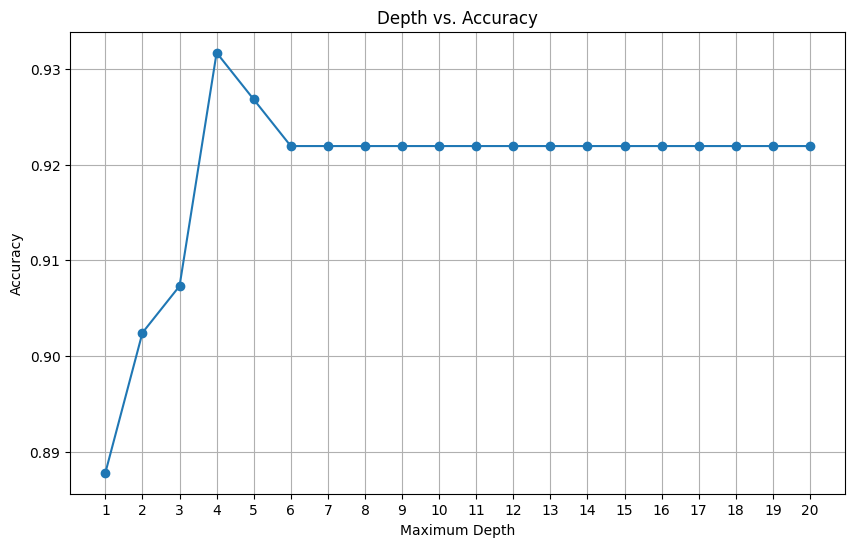

In [41]:
# Varying maximum depths for pre-pruning
max_depths = list(range(1, 21))  # Experiment with depths from 1 to 20
accuracy_scores = []

for depth in max_depths:
    # Build the decision tree with pre-pruning
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)

    # Predict on the test set
    y_pred = tree.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(max_depths, accuracy_scores, marker='o')
plt.title('Depth vs. Accuracy')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depths)
plt.grid(True)
plt.show()

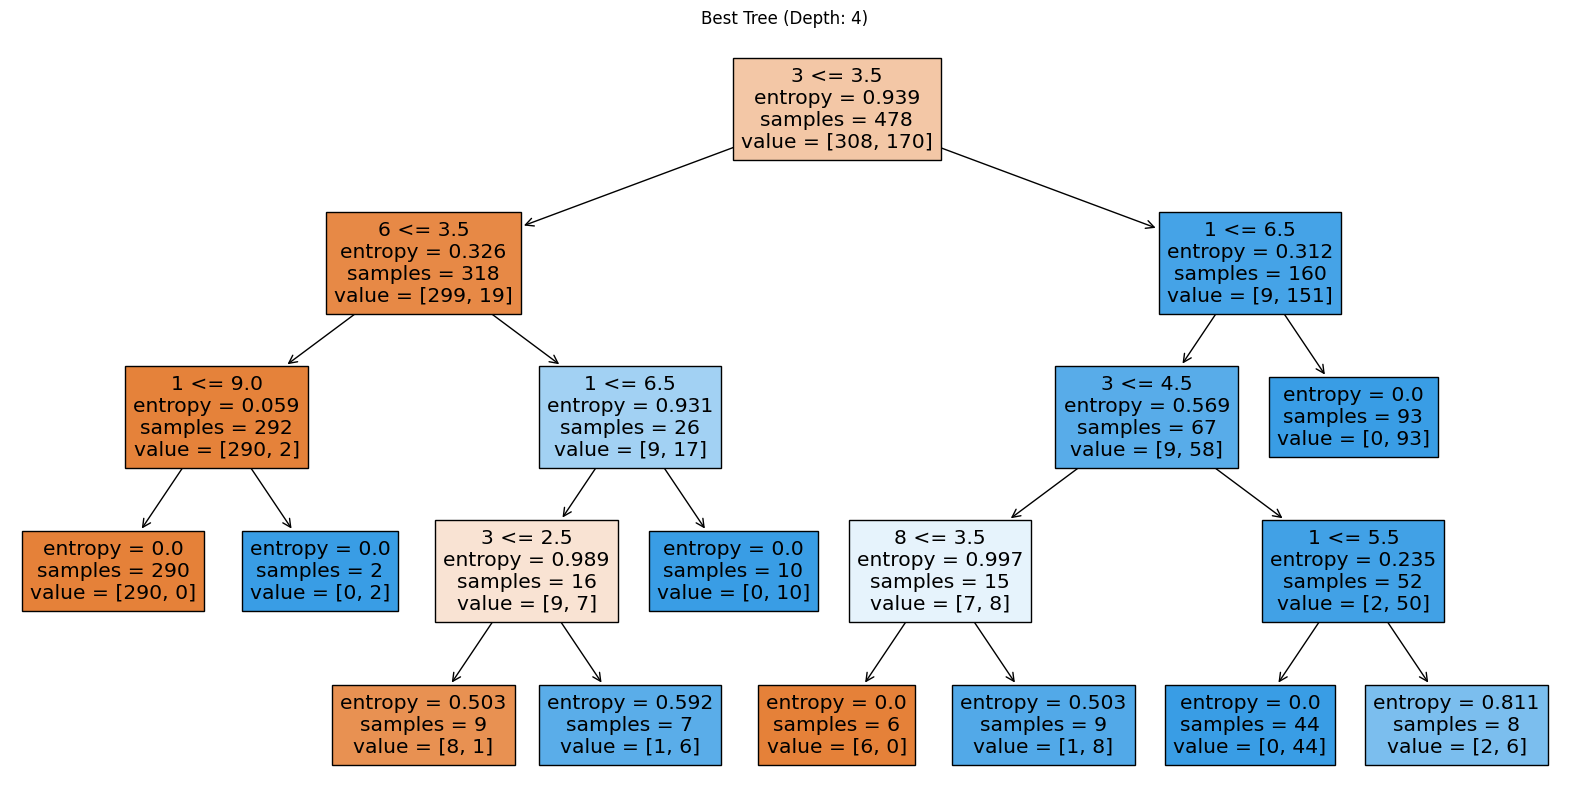

In [42]:
best_depth = max_depths[accuracy_scores.index(max(accuracy_scores))]
best_tree = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth, random_state=42)
best_tree.fit(X_train, y_train)

# Plotting the best tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_tree, filled=True, feature_names=features.columns)
plt.title(f"Best Tree (Depth: {best_depth})")
plt.show()
